In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("Sample - Superstore.csv",encoding="unicode_escape")

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
for x in df.columns:
    n= df[x].nunique()
    print(f'{x} : {n}')

Row ID : 9994
Order ID : 5009
Order Date : 1237
Ship Date : 1334
Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Postal Code : 631
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287


In [9]:
# ETL 
# ENTER , TRANSFORM, LOAD

In [10]:
df['Cost']=-((df['Sales']-(df['Sales']*df['Discount']))-df['Profit']) # actual cost
df['Product_Price']=df['Sales']/df['Quantity'] #individual product cost

In [11]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='%m/%d/%Y',errors='coerce')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='%m/%d/%Y',errors='coerce')

In [14]:
print(df['Order Date'].iloc[1])

2016-11-08 00:00:00


In [15]:
'%m/%d/%Y'

'%m/%d/%Y'

In [16]:
df["Order Date"]

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [17]:
df['Ship Date'].iloc[300]-df['Order Date'].iloc[300]

Timedelta('6 days 00:00:00')

In [18]:
df['Delivery Time']=df['Ship Date']-df['Order Date']
df['Delivery Time']=df['Delivery Time'].astype('str')
df['Delivery Time']=df['Delivery Time'].apply(lambda x:x.split(' ')[0])
df['Delivery Time']=df['Delivery Time'].apply(lambda x:int(x))
df['Delivery Time']

0       3
1       3
2       4
3       7
4       7
       ..
9989    2
9990    5
9991    5
9992    5
9993    5
Name: Delivery Time, Length: 9994, dtype: int64

In [19]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Product_Price,Delivery Time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,-220.046400,130.9800,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,-512.358000,243.9800,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,-7.748600,7.3100,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-909.698625,191.5155,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,-15.378000,11.1840,7


In [20]:
df['Order_Month']=df['Order Date'].dt.month_name()
df['Order_Day']=df['Order Date'].dt.day_name()

In [23]:
df['Order_Day'].iloc[1]

'Tuesday'

# Exploratory Data Analysis

- what is Most Frequent Product Name We Sale?

In [24]:
df.value_counts('Product Name',ascending=False)

Product Name
Staple envelope                                                              48
Staples                                                                      46
Easy-staple paper                                                            46
Avery Non-Stick Binders                                                      20
Staples in misc. colors                                                      19
                                                                             ..
Xerox 1922                                                                    1
4009 Highlighters                                                             1
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection     1
Brother MFC-9340CDW LED All-In-One Printer, Copier Scanner                    1
Cisco SPA 501G IP Phone                                                       1
Length: 1850, dtype: int64

In [25]:
most_product_sold=df['Product Name'].value_counts(ascending=False)
Top_5_products=pd.DataFrame(most_product_sold[:5]) # Index function is been used
Top_5_products

,Product Name
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19


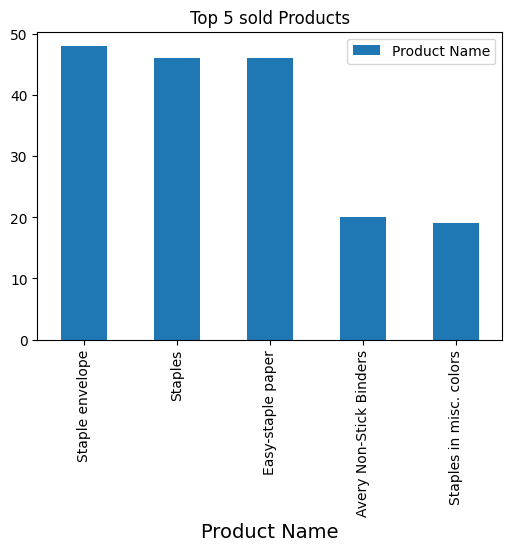

In [26]:
Top_5_products.plot(kind='bar',figsize=(6,4),title='Top 5 sold Products')
plt.xlabel('Product Name',fontsize=14)
plt.show()

# Most Region,State and City Ordered

In [27]:
most_Region=df['Region'].value_counts()
top_Region=pd.DataFrame(most_Region)
top_Region

,Region
West,3203
East,2848
Central,2323
South,1620


In [28]:
most_State=df['State'].value_counts()
top_15_State=pd.DataFrame(most_State[:15])
top_15_State

,State
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255
North Carolina,249


In [29]:

top_cities=df['City'].value_counts()
top_15_cities=pd.DataFrame(top_cities[:15])
top_15_cities

,City
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
Houston,377
Chicago,314
Columbus,222
San Diego,170
Springfield,163


In [35]:
(df["Discount"]*100).value_counts()

0.0     4798
20.0    3657
70.0     418
80.0     300
30.0     227
40.0     206
60.0     138
10.0      94
50.0      66
15.0      52
32.0      27
45.0      11
Name: Discount, dtype: int64

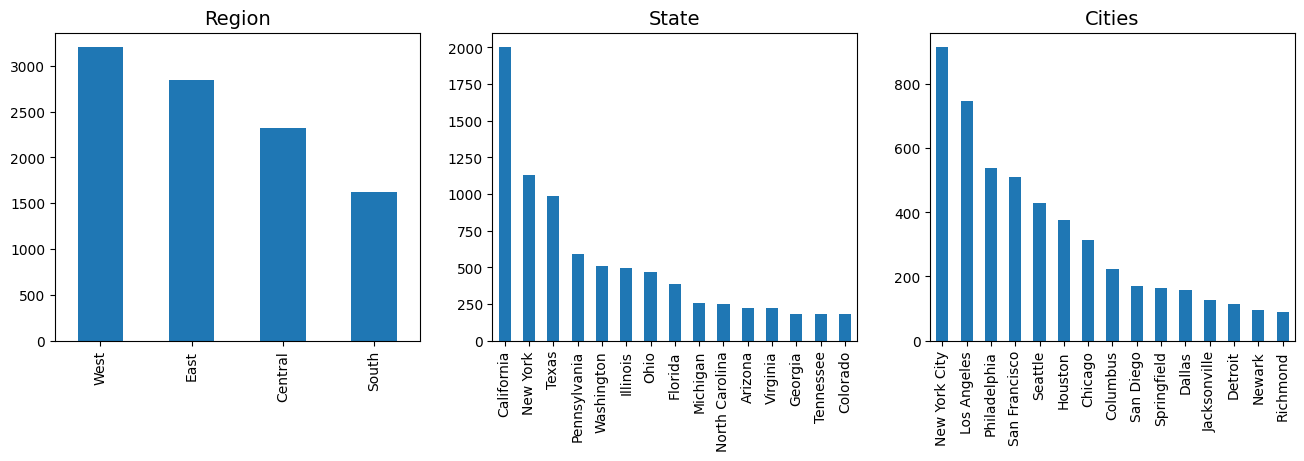

In [36]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
df['Region'].value_counts(ascending=False).plot(kind='bar')
plt.title('Region',fontsize=14)
plt.subplot(1,3,2)

df['State'].value_counts(ascending=False)[:15].plot(kind='bar')
plt.title('State',fontsize=14)

plt.subplot(1,3,3)
df['City'].value_counts(ascending=False)[:15].plot(kind='bar')
plt.title('Cities',fontsize=14)
plt.show()

# Most Discount Given To The Customers

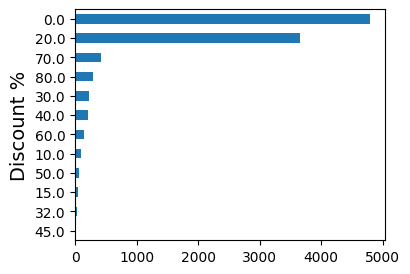

In [37]:
plt.figure(figsize=(4,3))
(df['Discount']*100).value_counts(ascending=True).plot(kind='barh')
plt.ylabel('Discount %',fontsize=14)
plt.show()

# What is The Most Sold Category & Sub-Category?

In [38]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [39]:
most_Cat=df['Category'].value_counts()
Most_category=pd.DataFrame(most_Cat)
Most_category

,Category
Office Supplies,6026
Furniture,2121
Technology,1847


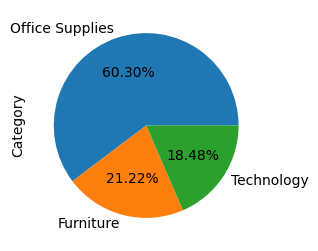

In [46]:
plt.figure(figsize=(4,3))
df['Category'].value_counts().plot(kind='pie', autopct="%1.2f%%")
plt.show()

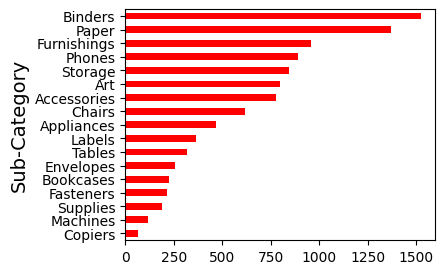

In [50]:
plt.figure(figsize=(4,3))

df['Sub-Category'].value_counts(ascending=True).plot(kind='barh', color="r")
plt.ylabel('Sub-Category',fontsize=14)
plt.show()

it seems that ['Binders','Paper','Furnishings'] Categories are Buying well on the other hand ['Supplies','Machines','Copiers'] need more improvement in their Qyality or Markiting'

# Who is most Loyal Customer?

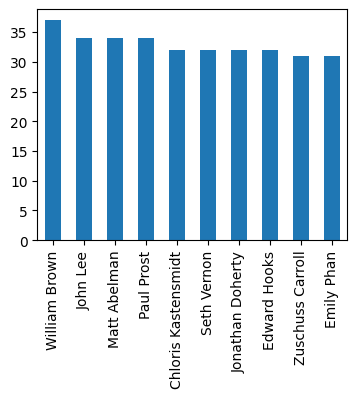

In [51]:
plt.figure(figsize=(4,3))
df['Customer Name'].value_counts()[:10].plot(kind='bar');

# Day & Month When our Business flourish

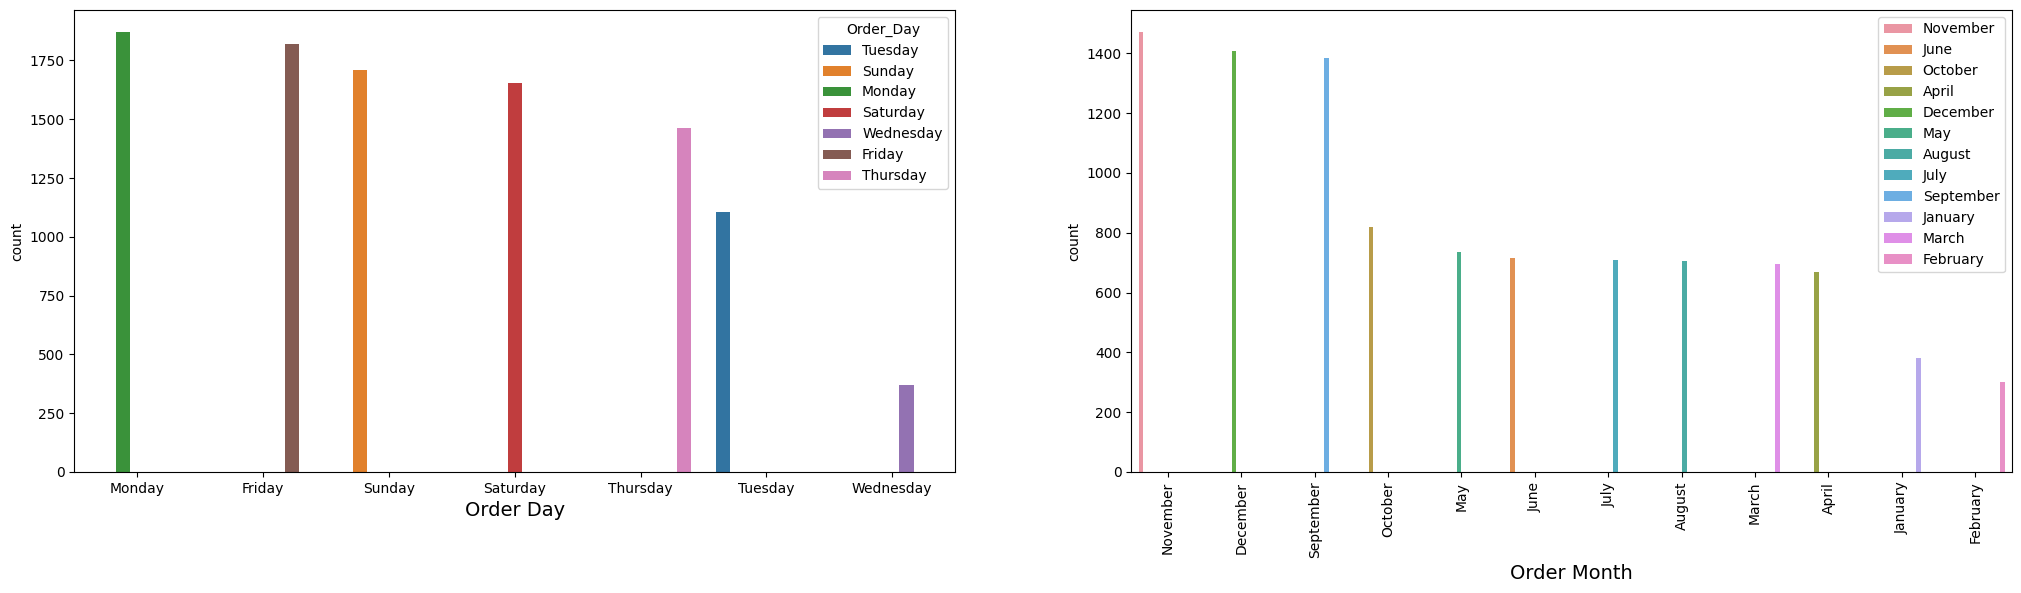

In [66]:
plt.figure(figsize=(25,6))
plt.subplot(1,2,1)
sns.countplot(data=df,x=df['Order_Day'],hue='Order_Day',order=df['Order_Day'].value_counts().index)
plt.xlabel('Order Day',fontsize=14)
plt.subplot(1,2,2)
sns.countplot(data=df,x=df['Order_Month'],hue='Order_Month',order=df['Order_Month'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Order Month', fontsize=14)
plt.legend(loc= 'best')
plt.show()

# Analysis in terms of Sales & Profit
## Sales-Profit ratio per Customer

In [53]:
Cus_Sal=df.groupby(df['Customer Name']).Sales.agg('sum').sort_values(ascending=False)
top_Cus_sales=pd.DataFrame(Cus_Sal)
top_Cus_sales

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
...,...
Roy Skaria,22.328
Mitch Gastineau,16.739
Carl Jackson,16.520


In [54]:
Cus_Prof=df.groupby(df['Customer Name']).Profit.agg('sum').sort_values(ascending=False)
top_Cus_Profit=pd.DataFrame(Cus_Prof)
top_Cus_Profit

,Profit
Customer Name,
Tamara Chand,8981.3239
Raymond Buch,6976.0959
Sanjit Chand,5757.4119
Hunter Lopez,5622.4292
Adrian Barton,5444.8055
...,...
Henry Goldwyn,-2797.9635
Sharelle Roach,-3333.9144
Luke Foster,-3583.9770


In [55]:
Sales_Profit_ratio=pd.concat([top_Cus_sales,top_Cus_Profit],axis=1,ignore_index=True)
Sales_Profit_ratio

,0,1
Customer Name,,
Sean Miller,25043.050,-1980.7393
Tamara Chand,19052.218,8981.3239
Raymond Buch,15117.339,6976.0959
Tom Ashbrook,14595.620,4703.7883
Adrian Barton,14473.571,5444.8055
...,...,...
Roy Skaria,22.328,9.5838
Mitch Gastineau,16.739,-1.2453
Carl Jackson,16.520,1.6520


In [69]:
# Get clear analysis for the sales profit  ratio

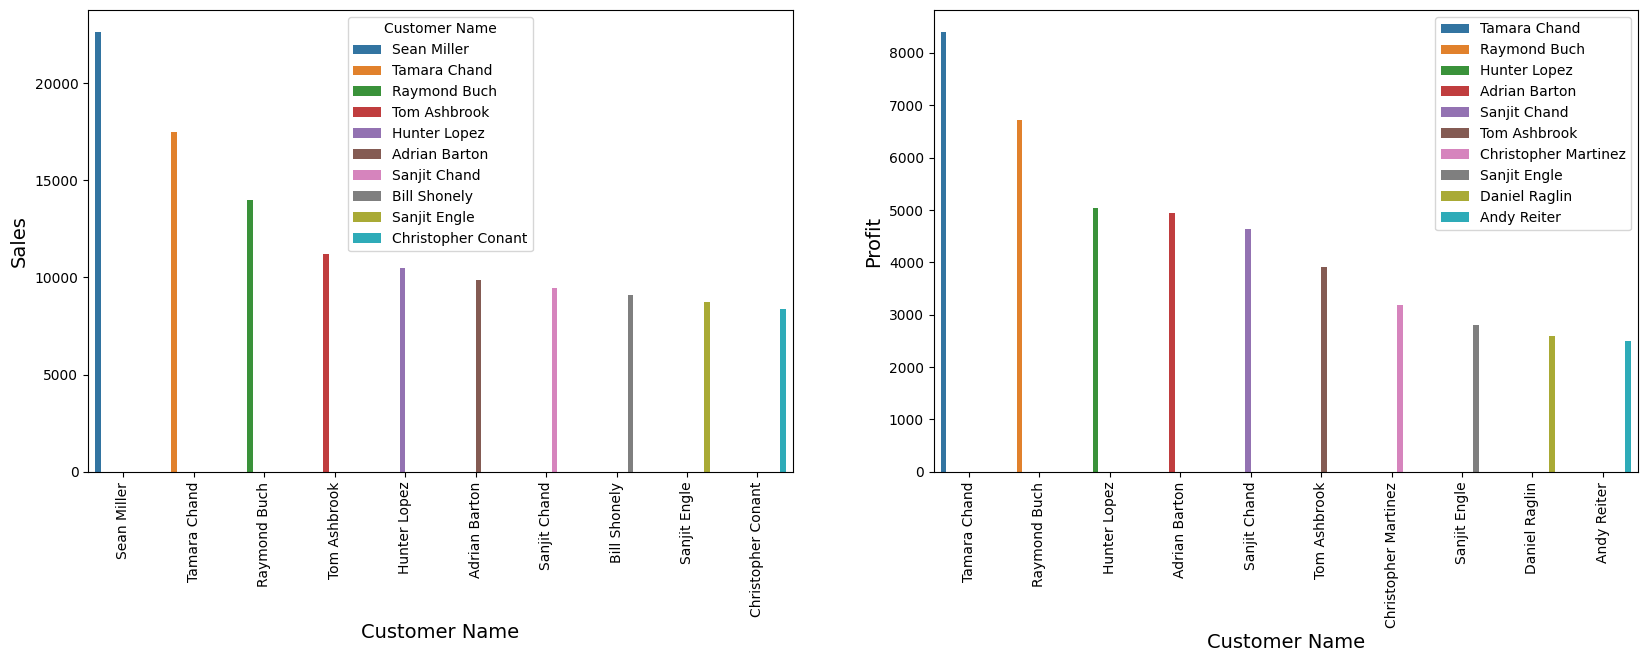

In [65]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
top_10_customer_Sales=df.sort_values('Sales',ascending=False)[:10]
sns.barplot(x='Customer Name',y='Sales',data=top_10_customer_Sales,hue='Customer Name')
plt.xlabel('Customer Name',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
top_10_Customer_Profit = df.sort_values('Profit',ascending=False)[:10]
sns.barplot(x='Customer Name',y='Profit',data=top_10_Customer_Profit,hue='Customer Name')
plt.xlabel('Customer Name',fontsize=14)
plt.ylabel('Profit',fontsize=14)
plt.xticks(rotation=90)
plt.legend(loc= 'best')
plt.show()


# Most [Region,State,City] Sales & Profit

In [67]:
Most_Region_sales=pd.DataFrame(df.groupby(df['Region']).Sales.agg('sum').sort_values(ascending=False))
Most_Region_sales

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


In [68]:
Most_Region_Profit=pd.DataFrame(df.groupby(df['Region']).Profit.agg('sum').sort_values(ascending=False))
Most_Region_Profit

,Profit
Region,
West,108418.4489
East,91522.7800
South,46749.4303
Central,39706.3625


Text(0.5, 0, 'Profit')

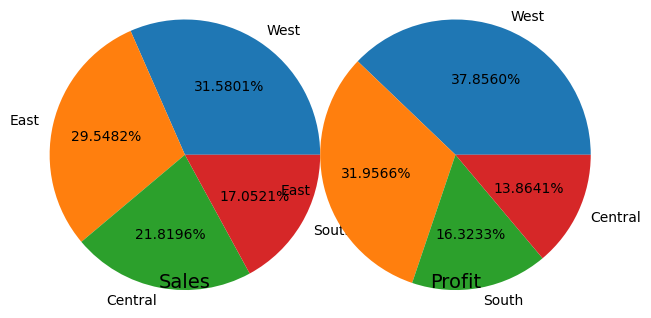

In [78]:
plt.subplot(1,2,1)
df.groupby(df['Region']).Sales.agg('sum').sort_values(ascending=False).plot(kind='pie', autopct="%1.4f%%", radius=1.5)
plt.ylabel('',fontsize=14)
plt.xlabel('Sales',fontsize=14)
plt.subplot(1,2,2)
df.groupby(df['Region']).Profit.agg('sum').sort_values(ascending=False).plot(kind='pie', autopct="%1.4f%%", radius =1.5)
plt.ylabel('',fontsize=14)
plt.xlabel('Profit',fontsize=14)

In [79]:
top_10_State_sales=pd.DataFrame(df.groupby('State').Sales.agg('sum').sort_values(ascending=False)[:10])
top_10_State_sales

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140
Florida,89473.7080
Illinois,80166.1010
Ohio,78258.1360
Michigan,76269.6140


In [80]:
top_10_State_Profit=pd.DataFrame(df.groupby('State').Profit.agg('sum').sort_values(ascending=False)[:10])
top_10_State_Profit

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


ValueError: Could not interpret input 'State'

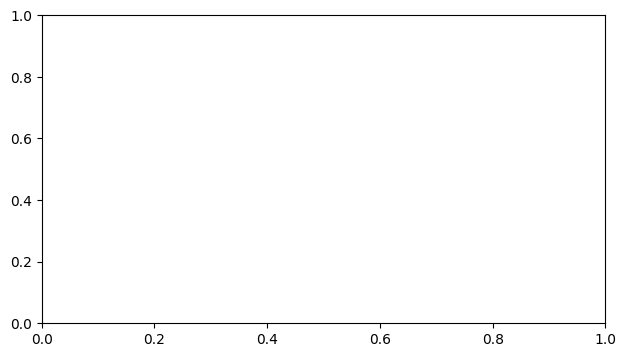

In [81]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)

sns.barplot(x='State',y='Sales',data=top_10_State_sales,estimator=np.sum, hue='State')
plt.ylabel('Sales',fontsize=14)
plt.xlabel('State',fontsize=14)
plt.xticks(rotation=90)

plt.subplot(1,2,2)

sns.barplot(x='State',y='Profit',data=top_10_State_Profit,estimator=np.sum,hue='State')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('State',fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [82]:
top_10_city_sales=pd.DataFrame(df.groupby('City').Sales.agg('sum').sort_values(ascending=False))[:10]
top_10_city_sales

,Sales
City,
New York City,256368.1610
Los Angeles,175851.3410
Seattle,119540.7420
San Francisco,112669.0920
Philadelphia,109077.0130
Houston,64504.7604
Chicago,48539.5410
San Diego,47521.0290
Jacksonville,44713.1830


In [83]:
top_10_city_Profit=pd.DataFrame(df.groupby('City').Profit.agg('sum').sort_values(ascending=False))[:10]
top_10_city_Profit

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


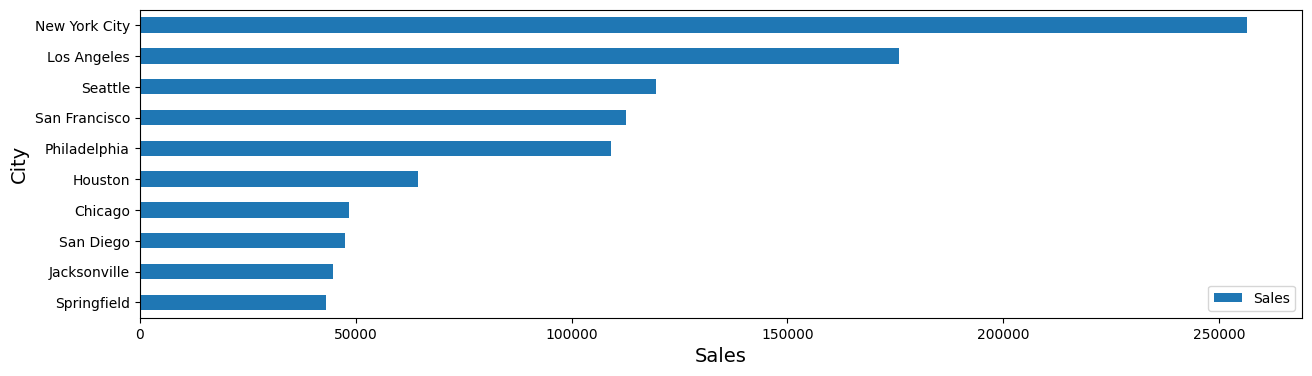

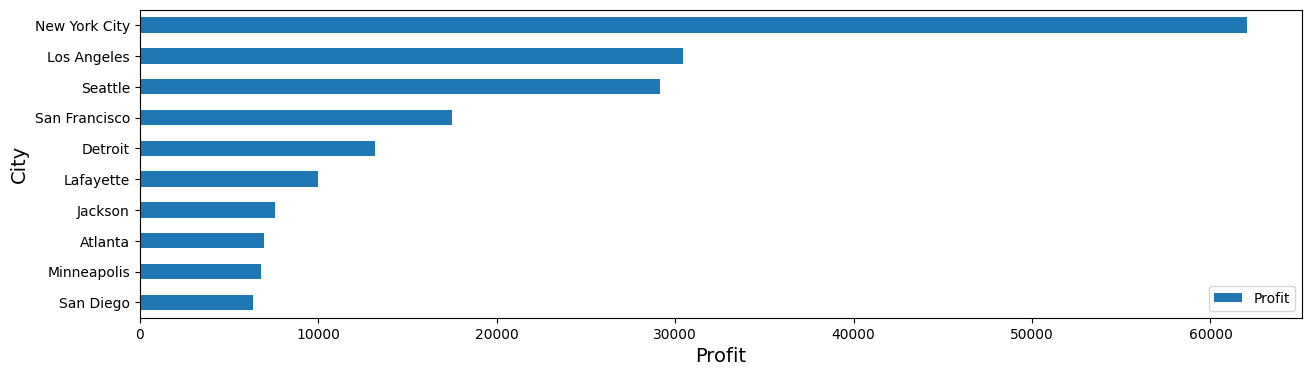

In [84]:
top_10_city_sales.sort_values('Sales',ascending=True).plot(kind='barh',figsize=(15,4))
plt.ylabel('City',fontsize=14)
plt.xlabel('Sales',fontsize=14)

top_10_city_Profit.sort_values('Profit',ascending=True).plot(kind='barh',figsize=(15,4))
plt.ylabel('City',fontsize=14)
plt.xlabel('Profit',fontsize=14)
plt.show()

# Which Segment is Profitable more?

In [85]:
Profitable_Segment=pd.DataFrame(df.groupby(df['Segment']).Profit.agg('sum').sort_values(ascending=False))
Profitable_Segment

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


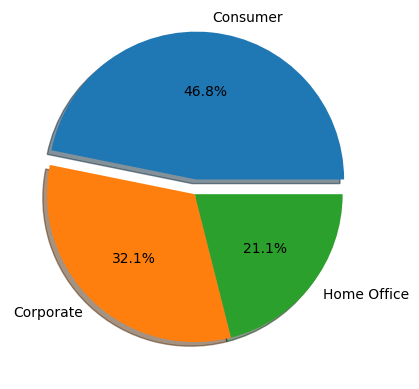

In [87]:
fig,ax=plt.subplots()
ax.pie(Profitable_Segment.values.squeeze(),labels=Profitable_Segment.index,autopct='%1.1f%%',explode=(0.1,0,0),shadow=True)
plt.show()

# Which Product We Sell & Profitable more?

In [88]:
top_10_product_sales=df.groupby(df['Product Name']).Sales.agg('sum').sort_values(ascending=False)[:10]
Top_10_product_sales=pd.DataFrame(top_10_product_sales)
Top_10_product_sales

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


In [89]:
top_10_product_Profit=df.groupby(df['Product Name']).Profit.agg('sum').sort_values(ascending=False)[:10]
Top_10_product_Profit=pd.DataFrame(top_10_product_Profit)
Top_10_product_Profit

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
Ativa V4110MDD Micro-Cut Shredder,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,3696.2820
Ibico EPK-21 Electric Binding System,3345.2823


# Best Seller & Profitable Category and Sub-Category

In [90]:
best_Cat_sales=df.groupby(df['Category']).Sales.agg('sum').sort_values(ascending=False)
Best_cat_sales=pd.DataFrame(best_Cat_sales)
Best_cat_sales

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


In [91]:
best_Cat_Profit=df.groupby(df['Category']).Profit.agg('sum').sort_values(ascending=False)
Best_cat_Profit=pd.DataFrame(best_Cat_Profit)
Best_cat_Profit

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


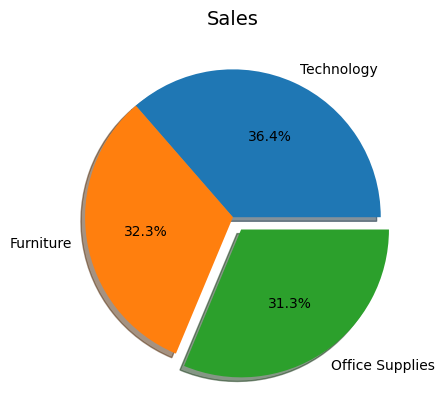

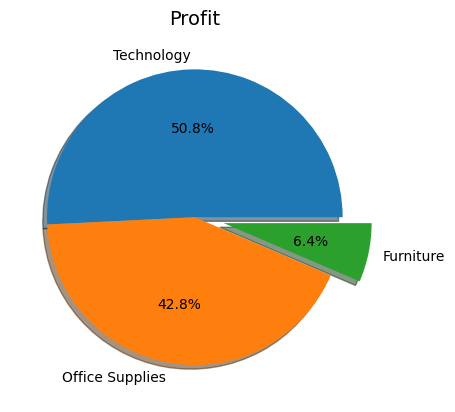

In [92]:
fig1,ax1=plt.subplots()
ax1.pie(Best_cat_sales.values.squeeze(),labels=Best_cat_sales.index,autopct='%1.1f%%',explode=(0,0,0.1),shadow=True);
plt.title('Sales',fontsize=14)

fig2,ax2=plt.subplots()
ax2.pie(Best_cat_Profit.values.squeeze(),labels=Best_cat_Profit.index,autopct='%1.1f%%',explode=(0,0,0.2),shadow=True);
plt.title('Profit',fontsize=14)

plt.show()

In [93]:
# ANALYSE FOR SUB CATEGORY

In [94]:
# Ship Mode By Sales and Average Delivery Time

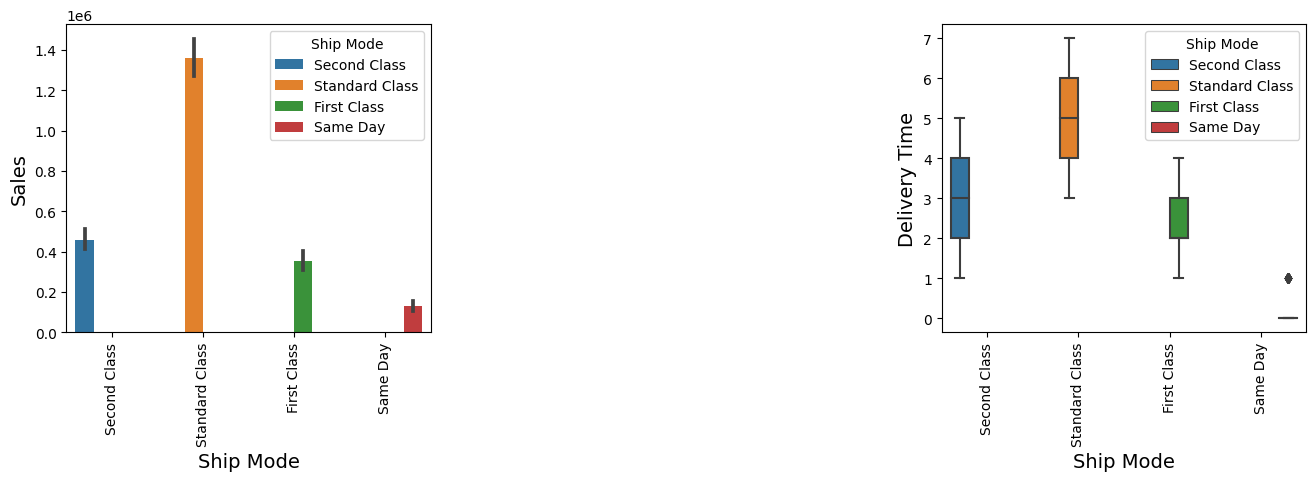

In [95]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.barplot(x='Ship Mode',y='Sales',data=df,estimator=np.sum,hue='Ship Mode')
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Ship Mode',fontsize=14)
plt.xticks(rotation=90)
plt.subplot(1,3,3)

sns.boxplot(x='Ship Mode',y='Delivery Time',data=df,hue='Ship Mode')
plt.ylabel('Delivery Time',fontsize=14)
plt.xlabel('Ship Mode',fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [97]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Cost,Product_Price,Delivery Time,Order_Month,Order_Day
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,-220.046400,130.9800,3,November,Tuesday
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,-512.358000,243.9800,3,November,Tuesday
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,-7.748600,7.3100,4,June,Sunday
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-909.698625,191.5155,7,October,Sunday
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,-15.378000,11.1840,7,October,Sunday
